# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** MOHAMMAD IQBAL MAULANA
- **Email:** iqbalmaulana99826@gmail.com
- **ID Dicoding:** m_iqbal_m

## Menentukan Pertanyaan Bisnis

- Apa produk dengan penjualan tertinggi dan terendah dalam periode waktu tertentu?
- Menampilkan hasil lokasi geografis dengan pelanggan terbanyak

## Import Semua Packages/Library yang Digunakan

In [103]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import matplotlib.image as mpimg

## Data Wrangling

### Gathering Data

In [2]:
# Direktori dataset 
orders = pd.read_csv('Dataset/orders_dataset.csv')
products = pd.read_csv('Dataset/products_dataset.csv')
customers = pd.read_csv('Dataset/customers_dataset.csv')
order_reviews = pd.read_csv('Dataset/order_reviews_dataset.csv')
order_items = pd.read_csv('Dataset/order_items_dataset.csv')
order_payments = pd.read_csv('Dataset/order_payments_dataset.csv')
sellers = pd.read_csv('Dataset/sellers_dataset.csv')
geolocation = pd.read_csv('Dataset/geolocation_dataset.csv')
product_category = pd.read_csv('Dataset/product_category_name_translation.csv')

# Menyimpan dataset dalam dictionary
dataset = {
  'orders': orders,
  'products': products,
  'customers': customers,
  'order_reviews': order_reviews,
  'order_items': order_items,
  'order_payments': order_payments,
  'sellers': sellers,
  'geolocation': geolocation,
  'product_category': product_category
}


In [3]:
dataset['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
dataset['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [5]:
dataset['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
dataset['order_reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
dataset['order_items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
dataset['order_payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
dataset['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [10]:
dataset['geolocation'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [11]:
dataset['product_category'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

Periksa semua tipe data

In [12]:
for df_name, df in dataset.items():
    print('\n', dataset[df_name].info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                

In [13]:
# Kolom-kolom dalam DataFrame 'orders' yang perlu diubah menjadi datetime
datetime_orders = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_orders:
    dataset['orders'][column] = pd.to_datetime(dataset['orders'][column])  # Mengubah kolom menjadi datetime
# Kolom-kolom dalam DataFrame 'order_items' yang perlu diubah menjadi datetime
datetime_order_items = ["shipping_limit_date"]
for column in datetime_order_items:
    dataset['order_items'][column] = pd.to_datetime(dataset['order_items'][column])  # Mengubah kolom menjadi datetime
# Kolom-kolom dalam DataFrame 'order_reviews' yang perlu diubah menjadi datetime
datetime_order_reviews = ["review_creation_date", "review_answer_timestamp"]
for column in datetime_order_reviews:
    dataset['order_reviews'][column] = pd.to_datetime(dataset['order_reviews'][column])  # Mengubah kolom menjadi datetime

In [14]:
# 1. Memeriksa tipe data kolom pada DataFrame 'orders'
print(dataset['orders'].dtypes)
# 2. Melihat beberapa baris pertama dari DataFrame 'orders'
print(dataset['orders'].head())
# 3. Menggunakan info() untuk mendapatkan ringkasan DataFrame
print(dataset['orders'].info())


order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:

periksa duplikasi data

In [15]:
def check_duplicated(dataset):
    results = []
    for name, df in dataset.items():
        print(f'\nMemeriksa duplikasi pada DataFrame: {name}')
        # Mengecek apakah ada baris yang duplikat
        duplicates = df.duplicated()
        total_duplicates = sum(duplicates)
        print(f'Jumlah baris duplikat: {total_duplicates}')

        if total_duplicates > 0:
            # Menampilkan beberapa baris yang terduplikasi
            duplicate_rows = df[duplicates].head(10)
            print("Baris yang terduplikasi (10 pertama):")
            print(duplicate_rows)
        
        # Menyimpan hasil ke dalam list
        results.append({
            'DataFrame Name': name,
            'Total Duplicates': total_duplicates
        })
    # Mengonversi hasil ke dalam DataFrame
    results_df = pd.DataFrame(results)
    return results_df
# Panggil fungsi untuk mengecek duplikasi
duplicates_report = check_duplicated(dataset)
# Menampilkan ringkasan hasil ke DataFrame
print("\nRingkasan Hasil Pengecekan Duplikasi:")
print(duplicates_report)



Memeriksa duplikasi pada DataFrame: orders
Jumlah baris duplikat: 0

Memeriksa duplikasi pada DataFrame: products
Jumlah baris duplikat: 0

Memeriksa duplikasi pada DataFrame: customers
Jumlah baris duplikat: 0

Memeriksa duplikasi pada DataFrame: order_reviews
Jumlah baris duplikat: 0

Memeriksa duplikasi pada DataFrame: order_items
Jumlah baris duplikat: 0

Memeriksa duplikasi pada DataFrame: order_payments
Jumlah baris duplikat: 0

Memeriksa duplikasi pada DataFrame: sellers
Jumlah baris duplikat: 0

Memeriksa duplikasi pada DataFrame: geolocation
Jumlah baris duplikat: 261831
Baris yang terduplikasi (10 pertama):
    geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
15                         1046       -23.546081       -46.644820   
44                         1046       -23.546081       -46.644820   
65                         1046       -23.546081       -46.644820   
66                         1009       -23.546935       -46.636588   
67                         10

Periksa nilai yang hilang

In [16]:
# Memeriksa apakah ada missing value
null_counts = {}
for name, df in dataset.items():
    null_counts[name] = df.isna().sum()
    print(f'Jumlah Missing Value di {name}: {null_counts[name]}')

Jumlah Missing Value di orders: order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
Jumlah Missing Value di products: product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
Jumlah Missing Value di customers: customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Jumlah Missing Value di order_reviews: review_id                      0
order_id                    

### Cleaning Data

orders

In [17]:
print(dataset['orders']['order_status'].value_counts())

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


In [18]:
print('Taking only orders we still get' + str(round((dataset['orders']['order_status'].value_counts()['delivered']/dataset['orders']['order_status'].value_counts().sum())*100, 2)) + '% of orders')

Taking only orders we still get97.02% of orders


In [19]:
# Ambil semua order_id yang statusnya tidak "delivered"
not_delivered_orders = dataset['orders'].loc[dataset['orders']['order_status'] != 'delivered', 'order_id']

for table_name, df in dataset.items():
    if 'order_id' in df.columns:
        df_filtered = df[~df['order_id'].isin(not_delivered_orders)]
        dataset[table_name] = df_filtered

In [20]:
# mengulang setiap kumpulan data dan mengecek apakah ada missing value
for dataset_name, df in dataset.items():
    nan_columns = df.columns[df.isnull().any()]
    
    for col in nan_columns:
        nan_count = df[col].isnull().sum()
        nan_percentage = (nan_count / len(df)) * 100
        print(f"{col} has {nan_count} NaNs ({nan_percentage:.2f}%)")

order_approved_at has 14 NaNs (0.01%)
order_delivered_carrier_date has 2 NaNs (0.00%)
order_delivered_customer_date has 8 NaNs (0.01%)
product_category_name has 610 NaNs (1.85%)
product_name_lenght has 610 NaNs (1.85%)
product_description_lenght has 610 NaNs (1.85%)
product_photos_qty has 610 NaNs (1.85%)
product_weight_g has 2 NaNs (0.01%)
product_length_cm has 2 NaNs (0.01%)
product_height_cm has 2 NaNs (0.01%)
product_width_cm has 2 NaNs (0.01%)
review_comment_title has 85153 NaNs (88.37%)
review_comment_message has 57262 NaNs (59.42%)


In [21]:
missing_delivered_orders = dataset['orders']['order_delivered_customer_date'].isna().sum()
print('hanya ada ' + str(missing_delivered_orders) + ' order yang tidak ada tanggal selesaian')

hanya ada 8 order yang tidak ada tanggal selesaian


In [22]:
# Ambil order_id dari pesanan yang tidak memiliki tanggal pengiriman (delivery date null)
undelivered_orders = dataset['orders'].query('order_delivered_customer_date.isnull()')['order_id']

for table_name, df in dataset.items():
    if 'order_id' in df.columns:
        dataset[table_name] = df[~df['order_id'].isin(undelivered_orders)]

In [23]:
# Buat fungsi untuk menentukan apakah pesanan tepat waktu atau terlambat
def check_delivery_status(row):
    if row['order_delivered_customer_date'] < row['order_estimated_delivery_date']:
        return 'On Time'
    else:
        return 'Late'

# Step 2: Terapkan fungsi pada setiap baris di dataframe 'orders'
dataset['orders']['delivered_on_time'] = dataset['orders'].apply(check_delivery_status, axis=1)
print(len(dataset['orders']))

96470


reviews

In [24]:
# Menampilkan kolom yang ada pada dataset 'reviews'
print(f"Review columns: {list(dataset['order_reviews'].columns)}")
# Kolom 'review_comment_title' memiliki 88% NaN, jadi kita hapus
drop_columns = [col for col in dataset['order_reviews'].columns if col == 'review_comment_title']
# Menghapus kolom yang sudah dipilih
dataset['reviews'] = dataset['order_reviews'].drop(columns=drop_columns)
# Menampilkan kolom setelah penghapusan
print(f"Remaining Review columns: {list(dataset['reviews'].columns)}")


Review columns: ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']
Remaining Review columns: ['review_id', 'order_id', 'review_score', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']


In [25]:
# Menggunakan .map() untuk mengganti NaN dengan 0 dan review dengan 1
dataset['reviews']['review_comment_message'] = dataset['reviews']['review_comment_message'].map(lambda x: 0 if pd.isnull(x) else 1)

Products

In [26]:
# Menampilkan nama kolom pada dataframe produk
print('Product cols:', list(dataset['products'].columns))

# Mengidentifikasi kolom yang tidak akan digunakan
product_drop_cols = [
    'product_name_lenght',
    'product_description_lenght',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm'
]

# Menghapus kolom yang tidak diperlukan 
dataset['products'] = dataset['products'].drop(columns=product_drop_cols)



Product cols: ['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']


In [27]:
# Menggunakan metode .replace() untuk mengganti NaN dengan 'outro'
dataset['products']['product_category_name'] = dataset['products']['product_category_name'].replace({pd.NA: 'outro'})

In [28]:
# Menggunakan metode replace untuk mengganti NaN dengan 0
dataset['products']['product_photos_qty'] = dataset['products']['product_photos_qty'].replace(np.nan, 0)
print(dataset['products']['product_photos_qty'].head(10))

0    1.0
1    1.0
2    1.0
3    1.0
4    4.0
5    1.0
6    4.0
7    2.0
8    1.0
9    1.0
Name: product_photos_qty, dtype: float64


geolocation

In [29]:
# menghapus baris duplikat
dataset['geolocation'].drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA)

### Explore customers

In [30]:
dataset['customers'].sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
75849,7cf011f302f46ab7b5e69b6461b32d8b,abbf7bd2953a81d660f8b07c9895888b,35460,brumadinho,MG
23676,cfca6800e760905907c4f40b45424745,6ad8b4d9cdddf93bca459b4821e1a81b,6765,taboao da serra,SP
13389,cdc8a72f10450759bd9aafd76c7a11b5,73e36e84433216c72ad58b4a63655fb4,2021,sao paulo,SP
65852,62d3febe33264f1fde72007055f55035,99cac6becaa593efe78dc7c471a6d90a,69033,manaus,AM
96872,ac89ebd5f9c1ee754571497f4834218c,6809aa2f1ac30ca945cc05e73aa99e18,96450,dom pedrito,RS


In [31]:
# Menghitung jumlah unik customer_id berdasarkan customer_city dan mengurutkan hasilnya
dataset['customers'].groupby('customer_city')['customer_id'].agg('nunique').sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
agisse                1
vieiras               1
bertopolis            1
abadiania             1
xexeu                 1
Name: customer_id, Length: 4119, dtype: int64

In [32]:
dataset['customers'].groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore payments

In [33]:
dataset['order_payments'].sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
67841,104ebad584414fcfb7bc0d071bb29a25,1,credit_card,3,53.10
74996,e95d501ef62dcec5a8d1a7eb222a02b9,1,credit_card,3,165.30
21628,cd5b7d5b405a2cee7a15972eaa47f1d3,1,credit_card,10,233.92
78634,4deb2316dadf42f0daa6b8965d384ba8,1,credit_card,5,157.80
8258,62c01156265aaaec691a0634593dd678,1,credit_card,3,158.82


In [34]:
dataset['order_payments'].groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    74297
boleto         19191
voucher         3679
debit_card      1484
Name: order_id, dtype: int64

### Explore orders

In [35]:
dataset['orders'].sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
90470,4aa0a4cc479d198113baae85bbb801c8,51a75e928a57e3f215029415a6057a8a,delivered,2017-08-18 14:27:08,2017-08-18 14:45:08,2017-08-21 20:45:51,2017-08-25 17:09:11,2017-09-12,On Time
53685,5bb9511e1d233eedad299acb511799f2,45f294770c10f58eec67ace0aac0cc5c,delivered,2018-04-12 09:55:13,2018-04-13 02:32:13,2018-04-17 01:03:59,2018-05-02 17:26:50,2018-05-15,On Time
11870,fd6271b5137f0a12cac31ef41cbef0a2,85968af43705828acf7ef9fc0a61d1b3,delivered,2018-01-31 11:33:30,2018-01-31 14:23:51,2018-02-03 00:38:29,2018-02-09 17:49:54,2018-03-08,On Time
46989,6f9f510503836c2006694d0d0f8b142a,c722eec1496fcaffe36d6c77cdcb2a37,delivered,2018-08-14 16:13:51,2018-08-14 16:44:09,2018-08-15 17:42:00,2018-08-20 19:08:04,2018-08-27,On Time
37915,2da6634703a5d34c99536f58334e9700,760640cf7e70b20bfa629430e7ebdff7,delivered,2017-07-14 00:00:34,2017-07-14 00:55:14,2017-07-18 16:03:10,2017-07-20 18:55:02,2017-07-31,On Time


In [36]:
dataset['orders']['delivered_on_time'].describe()

count       96470
unique          2
top       On Time
freq        88644
Name: delivered_on_time, dtype: object

### Explore customers dan orders

merge customers and orders

In [37]:
customers_orders_df = pd.merge(
    left=dataset['customers'],
    right=dataset['orders'],
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,On Time
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,On Time
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,Late
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,On Time
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,On Time


merge payments and reviews

In [38]:
payments_reviews_df = pd.merge(
    left=dataset['order_payments'],
    right=dataset['reviews'],
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payments_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,1.0,2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,0.0,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,1.0,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,0.0,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,0.0,2017-12-21,2017-12-22 01:10:39


In [39]:
payments_reviews_df.sort_values(by='payment_value', ascending=False).head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
50839,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,1.0,2017-10-18,2017-10-19 13:10:39
33495,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,1.0,2018-07-27,2018-07-28 02:36:10
40402,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,1.0,2017-03-04,2017-03-04 21:40:41
48364,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaT,NaT
83426,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,0.0,2017-06-06,2017-06-07 19:35:23


In [40]:
payments_reviews_df.groupby(by='payment_type').agg(
  {
    'order_id': 'nunique',
    'payment_value': ['min', 'max']
  }
)

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19191         11.62   7274.88
credit_card     74297          0.01  13664.08
debit_card       1484         13.38   4445.50
voucher          3679          0.00   1839.05

 Merge customers_orders & payments_reviews

In [41]:
customers_df = pd.merge(
    left=customers_orders_df,
    right=payments_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,delivered_on_time,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,On Time,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,0.0,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,On Time,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,0.0,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,Late,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,0.0,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,On Time,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,0.0,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,On Time,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,1.0,2018-08-10,2018-08-17 01:59:52


### Explore items & sellers

Merge items & sellers

In [42]:
item_seller_df = pd.merge(
    left=dataset['order_items'],
    right=dataset['sellers'],
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)

item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [43]:
# menghitung total penjualan berdasarkan kota
item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo         661
curitiba          124
rio de janeiro     92
belo horizonte     65
ribeirao preto     50
ibitinga           49
guarulhos          48
santo andre        44
campinas           40
maringa            40
Name: seller_id, dtype: int64

In [44]:
# menghitung total penjualan berdasarkan provinsi
item_seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)

seller_state
SP    1769
PR     335
MG     236
SC     184
RJ     163
RS     125
GO      39
DF      30
ES      22
BA      18
Name: seller_id, dtype: int64

### Explore products & category

Merge products & category

In [45]:
product_df = pd.merge(
    left=dataset['products'],
    right=dataset['product_category'],
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

product_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares


In [46]:
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

In [47]:
product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

Merge item_seller_df & product_df

In [48]:
sellers_df = pd.merge(
  left= product_df,
  right= item_seller_df,
  how='left',
  left_on='product_id',
  right_on='product_id'
)
sellers_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery,e17e4f88e31525f7deef66779844ddce,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694.0,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art,5236307716393b7114b53ee991f36956,1.0,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955.0,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1.0,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016.0,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby,143d00a4f2dde4e0364ee1821577adb3,1.0,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330.0,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1.0,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461.0,sao paulo,SP


In [49]:
sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20210,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,2.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1.0,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31,3635.0,sao paulo,SP
72816,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,4.0,computers,fefacc66af859508bf1a7934eab1e97f,1.0,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21,86026.0,londrina,PR
48744,1bdf5e6731585cf01aa8169c7028d6ad,artes,2.0,art,f5136e38d1a14a4dbd87dff67da82701,1.0,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.0,227.66,74210.0,goiania,GO
70764,a6492cc69376c469ab6f61d8f44de961,eletroportateis,2.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1.0,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.0,151.34,13480.0,limeira,SP
31736,c3ed642d592594bb648ff4a04cee2747,eletroportateis,2.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1.0,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.0,74.34,13480.0,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110167,5cac6a83708526b99c11e11027ae1ca6,moveis_decoracao,3.0,furniture_decor,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
110244,17c7ec33a1657924ad493e6978b4bf91,bebes,6.0,baby,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
110304,03b10f5e3ef07cfc27a025adca3fd0be,esporte_lazer,1.0,sports_leisure,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
110470,70adb75b3b2e86cffbb697c90867c3f3,moveis_decoracao,2.0,furniture_decor,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [50]:
sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         177  12.99  2990.00
air_conditioning                   246  10.90  1599.00
art                                195   5.35  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              348  14.90   598.99
...                                ...    ...      ...
stationery                        2264   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4093   5.00  2428.00
toys                              3803   4.90  1699.99
watches_gifts                     5493   8.99  3999.90

[71 rows x 3 columns]

### Explore geolocation

In [51]:
dataset['geolocation'].sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
688943,45120,-14.866931,-40.575416,barra do choca,BA
858815,83040,-25.516519,-49.196790,sao jose dos pinhais,PR
356138,15768,-20.247079,-50.689042,santa salete,SP
359089,15920,-21.165763,-48.629202,vista alegre do alto,SP
744445,60873,-3.854435,-38.498809,fortaleza,CE


In [52]:
dataset['geolocation'].groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

geolocation_zip_code_prefix
38400    779
35500    751
11680    727
11740    678
36400    627
        ... 
58403      1
1200       1
1189       1
1290       1
1262       1
Length: 19015, dtype: int64

In [53]:
# membuat filter data geolocation
dataset['geolocation'][dataset['geolocation']['geolocation_zip_code_prefix'] == 58400].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
732018,58400,-7.216959,-35.886354,campina grande,PB
732021,58400,-7.220686,-35.901843,campina grande,PB
732037,58400,-7.214395,-35.891863,campina grande,PB
732043,58400,-7.215701,-35.901166,campina grande,PB
732051,58400,-7.224424,-35.898409,campina grande,PB


### Explore All Data

Merge all data

In [54]:
all_data = pd.merge(
  left= customers_df,
  right=sellers_df,
  how='left',
  left_on='order_id',
  right_on='order_id'
)
all_data.head(20)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_photos_qty,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,3.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,2.0,sports_leisure,1.0,8f2ce03f928b567e3d56181ae20ae952,2017-09-20 18:25:11,259.90,22.31,5141.0,pirituba,SP
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,...,3.0,computers_accessories,1.0,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78,4102.0,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,...,0.0,NaN,1.0,2a7dc43cecabf23403078e2188437d1d,2017-11-22 19:55:41,19.90,16.11,4142.0,sao paulo,SP
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,...,5.0,toys,1.0,95e03ca3d4146e4011985981aeb959b9,2018-01-30 12:56:32,25.00,14.10,21210.0,rio de janeiro,RJ
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,...,1.0,furniture_decor,1.0,0241d4d5d36f10f80c644447315af0bd,2018-01-12 11:35:27,99.90,22.57,80330.0,curitiba,PR


In [55]:
all_data_df = all_data.drop_duplicates('order_id')

In [56]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96471 entries, 0 to 2305341
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    96471 non-null  object        
 1   customer_unique_id             96471 non-null  object        
 2   customer_zip_code_prefix       96471 non-null  int64         
 3   customer_city                  96471 non-null  object        
 4   customer_state                 96471 non-null  object        
 5   order_id                       96470 non-null  object        
 6   order_status                   96470 non-null  object        
 7   order_purchase_timestamp       96470 non-null  datetime64[ns]
 8   order_approved_at              96456 non-null  datetime64[ns]
 9   order_delivered_carrier_date   96469 non-null  datetime64[ns]
 10  order_delivered_customer_date  96470 non-null  datetime64[ns]
 11  order_estimated_de

In [57]:
# Menggunakan groupby dan aggregate dengan pendekatan berbeda
result = (
    all_data
    .groupby("customer_state")
    .agg(order_count=('order_id', 'nunique'), total_payment=('payment_value', 'sum'))
)
# Mengurutkan hasil berdasarkan total_payment secara menurun
sorted_result = result.sort_values(by="total_payment", ascending=False)
print(sorted_result)

                order_count  total_payment
customer_state                            
SP                    40494     7455331.70
RJ                    12350     2699623.08
MG                    11354     2290457.39
RS                     5344     1118250.44
PR                     4923     1036003.69
BA                     3256      775836.28
SC                     3546      769234.50
GO                     1957      497367.84
DF                     2080      424872.44
ES                     1995      399308.36
PE                     1593      362434.77
CE                     1279      335018.17
PA                      946      255609.57
MT                      886      251859.09
MA                      717      195528.31
PB                      517      177485.32
MS                      701      164556.97
PI                      476      133729.03
RN                      474      115203.08
AL                      397      108727.76
SE                      335       85694.32
TO         

In [58]:
# Menggunakan pivot_table untuk mengelompokkan data berdasarkan product_category_name_english
result = all_data.pivot_table(
    index='product_category_name_english', 
    values=['order_id', 'review_score'], 
    aggfunc={
        'order_id': 'nunique', 
        'review_score': ['min', 'max']
    }
)
print(result)

                              order_id review_score     
                               nunique          max  min
product_category_name_english                           
agro_industry_and_commerce         177          5.0  1.0
air_conditioning                   246          5.0  1.0
art                                195          5.0  1.0
arts_and_craftmanship               23          5.0  1.0
audio                              348          5.0  1.0
...                                ...          ...  ...
stationery                        2264          5.0  1.0
tablets_printing_image              79          5.0  1.0
telephony                         4093          5.0  1.0
toys                              3803          5.0  1.0
watches_gifts                     5493          5.0  1.0

[71 rows x 3 columns]


In [146]:
output_csv_path = "./Dataset/all_data.csv"
all_data.to_csv(output_csv_path, index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa produk dengan penjualan tertinggi dan terendah dalam periode waktu tertentu?

In [59]:
all_data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_photos_qty,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,3.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305337,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,2.0,books_general_interest,1.0,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,17400.0,garca,SP
2305338,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,1.0,sports_leisure,1.0,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16,14802.0,araraquara,SP
2305339,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,1.0,health_beauty,1.0,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04,3304.0,sao paulo,SP
2305340,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,1.0,watches_gifts,1.0,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07,14840.0,guariba,SP


In [60]:
product_id_counts= all_data.groupby('product_category_name_english')['product_id'].count().reset_index()
sorted_df = product_id_counts.sort_values(by='product_id', ascending=False)

sorted_df

,product_category_name_english,product_id
39,furniture_decor,198787
49,housewares,164659
43,health_beauty,149453
65,sports_leisure,145456
5,auto,143938
...,...,...
32,fashion_sport,30
3,arts_and_craftmanship,24
52,la_cuisine,16
11,cds_dvds_musicals,14


In [61]:
# Siapkan data untuk visualisasi
top_products = sorted_df.head(5)
bottom_products = sorted_df.sort_values(by="product_id", ascending=True).head(5)

C:\Users\PC\AppData\Local\Temp\ipykernel_8840\182758836.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_id", y="product_category_name_english", data=sorted_df.head(5), palette=colors, ax=ax[0])
C:\Users\PC\AppData\Local\Temp\ipykernel_8840\182758836.py:6: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(x="product_id", y="product_category_name_english", data=sorted_df.head(5), palette=colors, ax=ax[0])
C:\Users\PC\AppData\Local\Temp\ipykernel_8840\182758836.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_id", y="product_category_name_english", data=sorted_df.sort_values(by="product_id", ascending=True

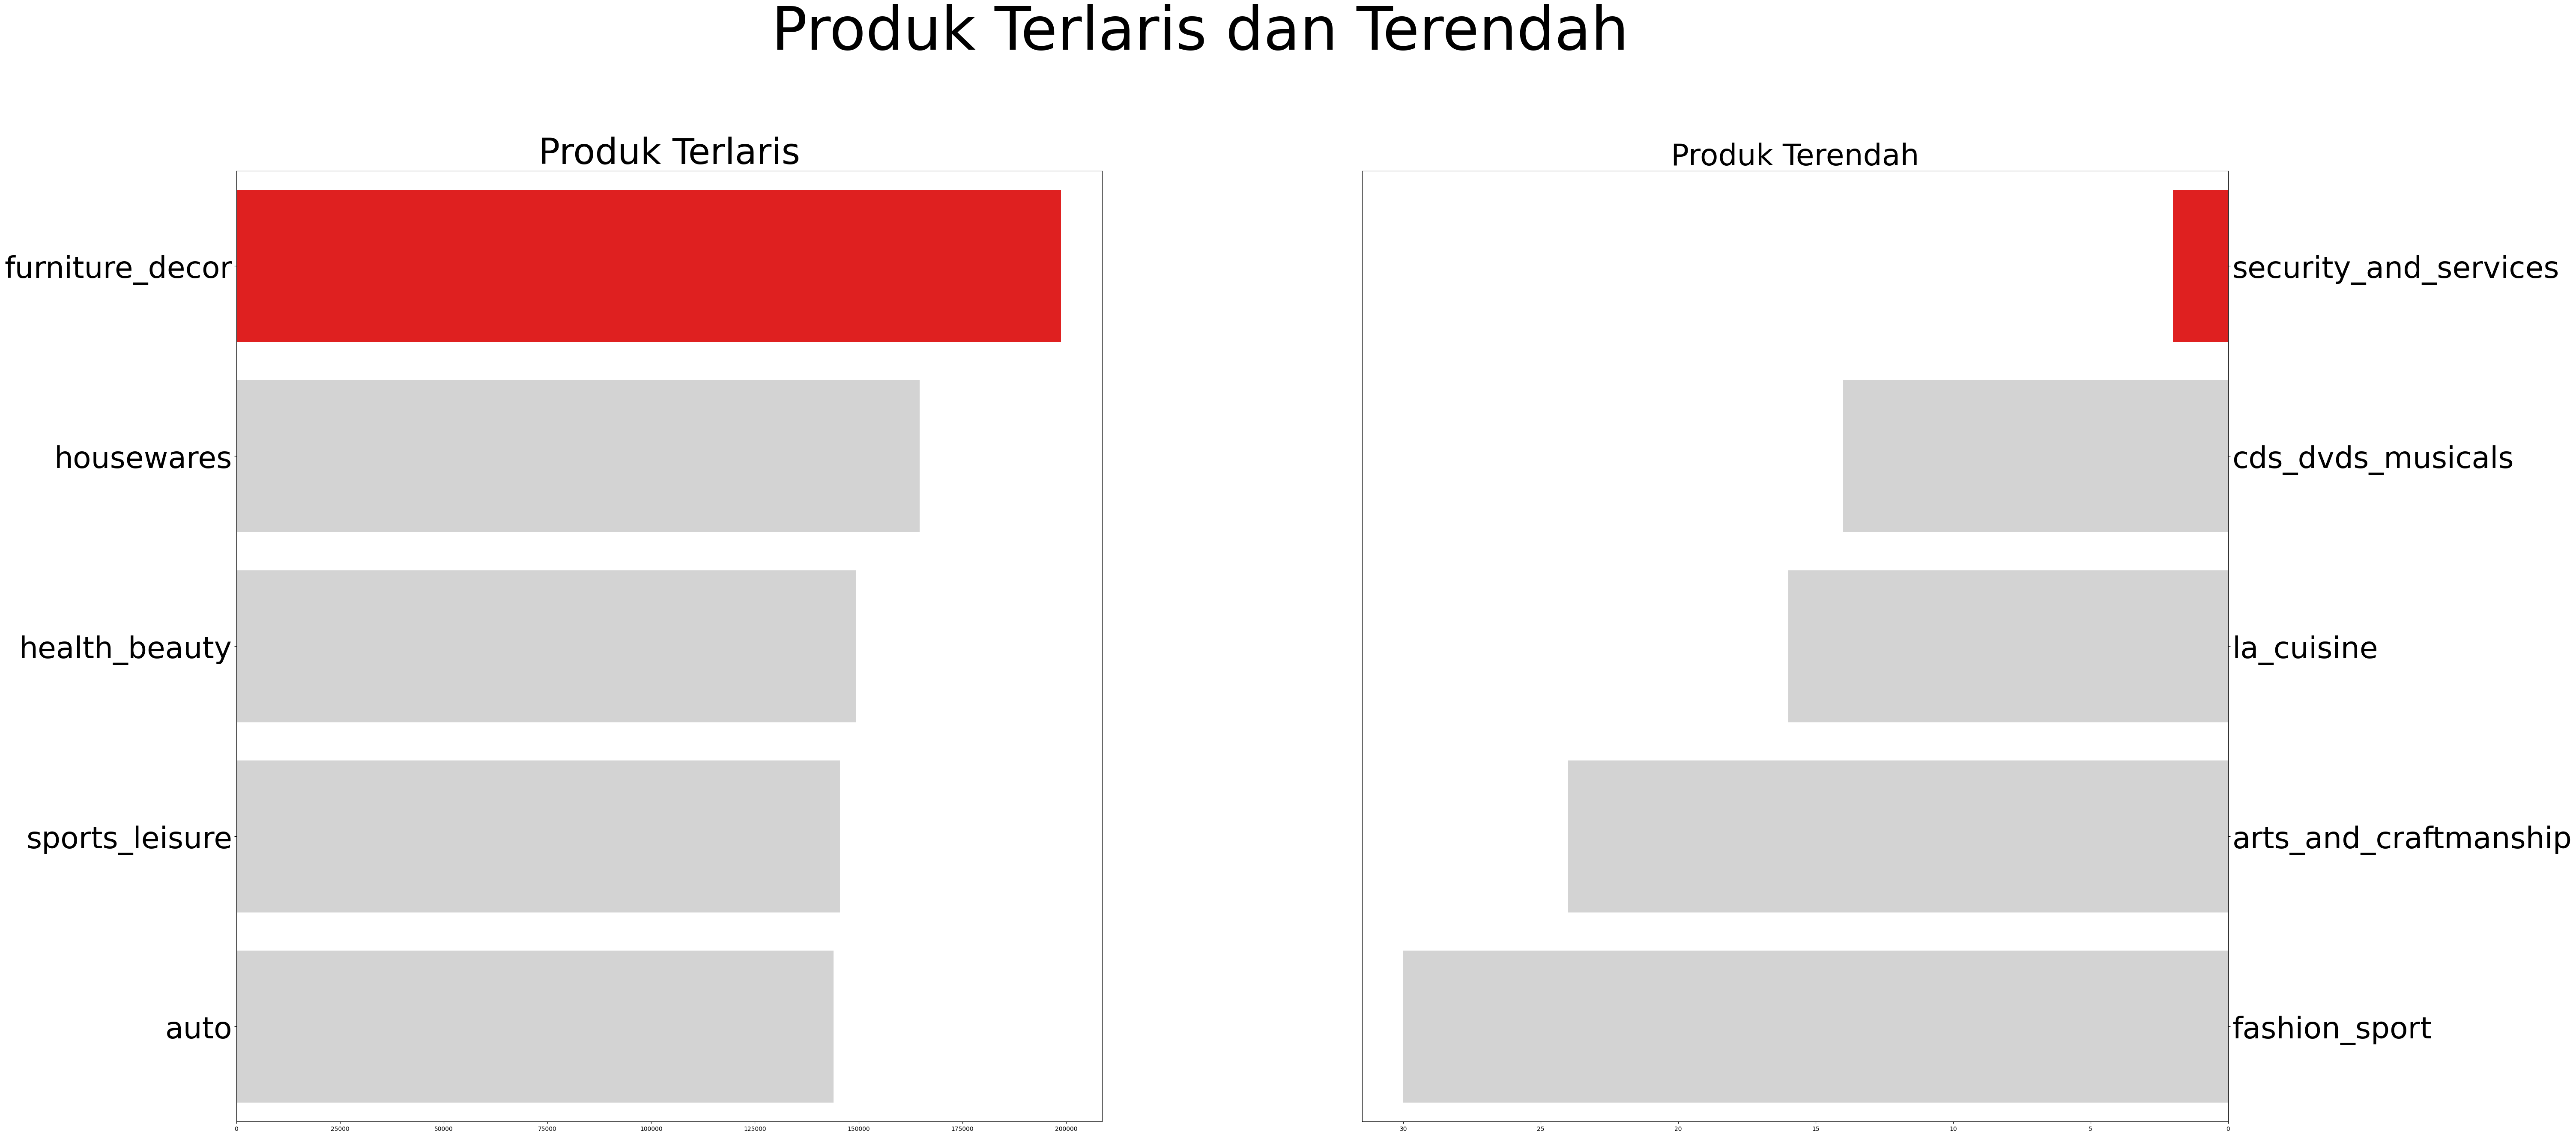

In [62]:
# Membuat subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(60, 30))

colors = ["#ff0000", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="product_id", y="product_category_name_english", data=sorted_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None) 
ax[0].set_xlabel(None)  
ax[0].set_title("Produk Terlaris", loc="center", fontsize=60) 
ax[0].tick_params(axis='y', labelsize=50)

sns.barplot(x="product_id", y="product_category_name_english", data=sorted_df.sort_values(by="product_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)  
ax[1].set_xlabel(None)  
ax[1].invert_xaxis() 
ax[1].yaxis.set_label_position("right") 
ax[1].yaxis.tick_right()
ax[1].set_title("Produk Terendah", loc="center", fontsize=50)
ax[1].tick_params(axis='y', labelsize=50)
plt.suptitle("Produk Terlaris dan Terendah", fontsize=100) 
plt.subplots_adjust(top=0.85, wspace=0.3)  
plt.show()

### Pertanyaan 2: Menampilkan hasil lokasi geografis dengan pelanggan terbanyak

In [77]:
max_state = dataset['geolocation'].groupby(['geolocation_zip_code_prefix'])['geolocation_state'].agg(lambda x: x.value_counts().index[0]).reset_index()

In [78]:
print(max_state.columns)
print(max_state.head())

Index(['geolocation_zip_code_prefix', 'geolocation_state'], dtype='object')
   geolocation_zip_code_prefix geolocation_state
0                         1001                SP
1                         1002                SP
2                         1003                SP
3                         1004                SP
4                         1005                SP


In [79]:
geolocation_silver = dataset['geolocation'].groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()

In [80]:
geolocation_silver = geolocation_silver.merge(
    max_state,
    on=['geolocation_zip_code_prefix', 'geolocation_state'],
    how='inner'
)

In [81]:
customers_silver = customers_df.merge(geolocation_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

In [82]:
customers_silver.head(20)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,88b8b52d46df026a9d1ad2136a59b30b,4.0,0.0,2017-05-26,2017-05-30 22:34:40,14409,franca,SP,-20.502307,-47.396740
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,0.0,2018-01-30,2018-02-10 22:43:29,9790,sao bernardo do campo,SP,-23.731211,-46.541206
2,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,0.0,2018-01-30,2018-02-10 22:43:29,9790,são bernardo do campo,SP,-23.727018,-46.543192
3,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,5ad6695d76ee186dc473c42706984d87,5.0,0.0,2018-06-15,2018-06-15 12:10:59,1151,sao paulo,SP,-23.531294,-46.657039
4,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,5ad6695d76ee186dc473c42706984d87,5.0,0.0,2018-06-15,2018-06-15 12:10:59,1151,são paulo,SP,-23.531294,-46.656866
5,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,059a801bb31f6aab2266e672cab87bc5,5.0,0.0,2018-03-29,2018-04-02 18:36:47,8775,mogi das cruzes,SP,-23.499025,-46.183436
6,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,8490879d58d6c5d7773f2739a03f089a,5.0,1.0,2018-08-10,2018-08-17 01:59:52,13056,campinas,SP,-22.974331,-47.142173
7,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,9a6614162d285301aa3ef6de4be75265,5.0,1.0,2017-09-29,2017-10-01 21:52:53,89254,jaragua do sul,SC,-26.471435,-49.114562
8,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,9a6614162d285301aa3ef6de4be75265,5.0,1.0,2017-09-29,2017-10-01 21:52:53,89254,jaraguá do sul,SC,-26.470583,-49.113512
9,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,...,bc88d3b86fa8443d42894eb7b5f0d73c,5.0,0.0,2018-02-21,2018-02-26 13:53:18,4534,sao paulo,SP,-23.583998,-46.673524


In [84]:
customers_silver =customers_silver.drop_duplicates('order_id')

In [85]:
customers_silver.to_csv('./Dataset/geolocation_silver.csv')

In [94]:
print(customers_silver.columns)
print(customers_silver.dtypes)

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'delivered_on_time',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state',
       'geolocation_lat', 'geolocation_lng'],
      dtype='object')
customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_id                                 object
order_status                

In [95]:
print(customers_silver[['geolocation_lat', 'geolocation_lng']].describe())
print(customers_silver[['geolocation_lat', 'geolocation_lng']].isna().sum())

       geolocation_lat  geolocation_lng
count     96207.000000     96207.000000
mean        -21.204484       -46.189159
std           5.594439         4.053761
min         -33.690989       -72.670621
25%         -23.589907       -48.119514
50%         -22.924820       -46.632639
75%         -20.140688       -43.625082
max          42.184003        -8.723762
geolocation_lat    0
geolocation_lng    0
dtype: int64


In [96]:
print(customers_silver[['geolocation_lat', 'geolocation_lng']].head())

   geolocation_lat  geolocation_lng
0       -20.502307       -47.396740
1       -23.731211       -46.541206
3       -23.531294       -46.657039
5       -23.499025       -46.183436
6       -22.974331       -47.142173


In [144]:

def plot_brazil_map(data):
    try:
        with urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg') as url:
            brazil = mpimg.imread(url, 'jpg')
    except Exception as e:
        print(f"Error fetching image: {e}")
        return
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.80, s=0.3, c='blue')
    plt.title('Scatter Plot of Customers in Brazil', fontsize=30)
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)
    plt.grid(True)
    plt.axis('off')
    plt.legend(loc="upper right")
    plt.imshow(brazil, extent=[-73.98283055, -33.8, -33.75116944, 5.4], alpha=0.5)
    plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_8840\2157075420.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right")


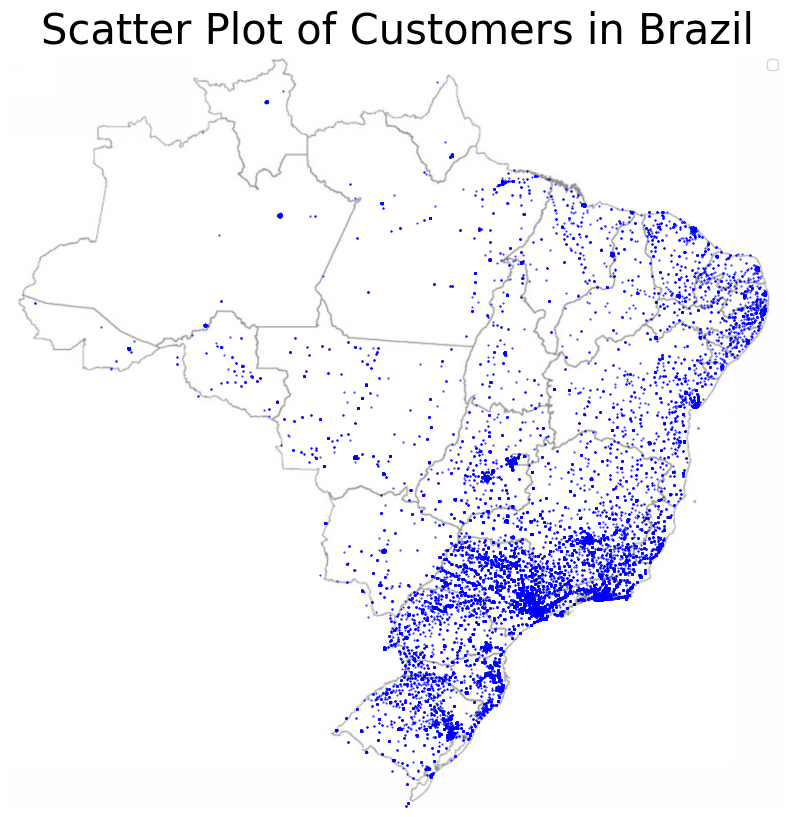

In [145]:
plot_brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))

## Conclusion

### Analisis Penjualan Produk dan Lokasi Geografis Pelanggan

#### 1. Produk dengan Penjualan Tertinggi dan Terendah
- **Produk dengan Penjualan Tertinggi**:  
  Berdasarkan visualisasi, kategori produk yang memiliki **penjualan tertinggi** adalah **"furniture_decor"**, yang ditandai dengan warna merah pada grafik di sebelah kiri.

- **Produk dengan Penjualan Terendah**:  
  Kategori produk dengan **penjualan terendah** adalah **"security_and_services"**, yang ditandai dengan warna merah pada grafik di sebelah kanan.

#### 2. Hasil Lokasi Geografis dengan Pelanggan Terbanyak
  Dari hasil peta sebaran pelanggan di Brasil, terlihat bahwa wilayah dengan konsentrasi pelanggan terbanyak berada di bagian tenggara Brasil, terutama di wilayah **São Paulo**, yang ditandai dengan kepadatan titik-titik biru. Wilayah ini merupakan pusat ekonomi utama Brasil.
